In [544]:
CLIENT_ID=*SEE NOTES*
CLIENT_SECRET=*SEE NOTES*

In [550]:
import spotipy
from spotipy import util
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import urllib

In [573]:
auth_manager = SpotifyClientCredentials()

SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

In [423]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))

In [341]:
blockbuster = 'spotify:track:5jQYkYhoOlBW4vJ2l4TCxl'

In [565]:
def show_album_art(uri):
    track = sp.track(uri)
    url = track['album']['images'][0]['url']
    f = urllib.request.urlopen(url)
    a = plt.imread(f, format='jpg')
    plt.axis(False)
    plt.imshow(a);

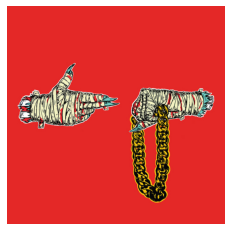

In [566]:
show_album_art(blockbuster)

In [342]:
track_features = sp.audio_features(blockbuster)

In [343]:
track_features

[{'danceability': 0.701,
  'energy': 0.525,
  'key': 1,
  'loudness': -7.938,
  'mode': 0,
  'speechiness': 0.382,
  'acousticness': 0.0353,
  'instrumentalness': 2.55e-06,
  'liveness': 0.0615,
  'valence': 0.385,
  'tempo': 75.693,
  'type': 'audio_features',
  'id': '5jQYkYhoOlBW4vJ2l4TCxl',
  'uri': 'spotify:track:5jQYkYhoOlBW4vJ2l4TCxl',
  'track_href': 'https://api.spotify.com/v1/tracks/5jQYkYhoOlBW4vJ2l4TCxl',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5jQYkYhoOlBW4vJ2l4TCxl',
  'duration_ms': 152253,
  'time_signature': 4}]

In [345]:
features_df[features_df['track_name'] == 'Bar Breaker']

,track_name,popularity,uri,danceability,valence,tempo,time_signature,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness
4,Bar Breaker,48,spotify:track:6LyzqxbVyIUoDtr4dYshIl,0.65,0.829,88.306,4,0.806,10,-4.293,0,0.255,0.101,0.0,0.281


In [40]:
mahler2_uri = 'spotify:album:2SVkyvRyCXIZ8WsGe8j0xc'

In [42]:
mahler2_features = sp.audio_features(mahler2_uri)

Expected id of type track but found type album spotify:album:2SVkyvRyCXIZ8WsGe8j0xc


In [60]:
sp.recommendation_genre_seeds()

{'genres': ['acoustic',
  'afrobeat',
  'alt-rock',
  'alternative',
  'ambient',
  'anime',
  'black-metal',
  'bluegrass',
  'blues',
  'bossanova',
  'brazil',
  'breakbeat',
  'british',
  'cantopop',
  'chicago-house',
  'children',
  'chill',
  'classical',
  'club',
  'comedy',
  'country',
  'dance',
  'dancehall',
  'death-metal',
  'deep-house',
  'detroit-techno',
  'disco',
  'disney',
  'drum-and-bass',
  'dub',
  'dubstep',
  'edm',
  'electro',
  'electronic',
  'emo',
  'folk',
  'forro',
  'french',
  'funk',
  'garage',
  'german',
  'gospel',
  'goth',
  'grindcore',
  'groove',
  'grunge',
  'guitar',
  'happy',
  'hard-rock',
  'hardcore',
  'hardstyle',
  'heavy-metal',
  'hip-hop',
  'holidays',
  'honky-tonk',
  'house',
  'idm',
  'indian',
  'indie',
  'indie-pop',
  'industrial',
  'iranian',
  'j-dance',
  'j-idol',
  'j-pop',
  'j-rock',
  'jazz',
  'k-pop',
  'kids',
  'latin',
  'latino',
  'malay',
  'mandopop',
  'metal',
  'metal-misc',
  'metalcore',


In [86]:
recs = sp.recommendations(seed_tracks=[blockbuster], 
                          limit=20)

In [87]:

len(recs['tracks'])

20

In [530]:
def spotify_uri_search(search, get_albums=False):
    q = search.replace(' ', '+')
    q += '+tag:hipster'
    res = sp.search(q=q)
    tracks = res['tracks']['items']
    results = []
    res_dict = {}
    if get_albums:
        q += '&type=album'
        for item in tracks:
            artists = ', '.join([artist['name'] for artist in item['artists']])
            results.append(item['album']['name'] + ' by ' + artists)
            res_dict[item['album']['name']] = item['uri']
        
        
    else:
        for item in tracks:
            res_dict[item['name']] = item['uri']
            results.append(item['name'] + ' by ' + item['artists'][0]['name'])
    return res_dict, results, q

In [531]:
res_dict, results, q = spotify_uri_search('blockbuster night')

In [532]:
results

[]

In [236]:
q

'album:mahler+5&type=album'

In [372]:
def choose_uri(results, res_dict):
    print(results)
    idx = input('Select index of song above.')
    choice = results[int(idx)].split(' by ')[0]
    return res_dict.get(choice)

In [373]:
uri = choose_uri(results, res_dict)

['Blockbuster Night, Pt. 1 by Run The Jewels', 'Blockbuster Night, Pt. 2 - Bonus Track by Run The Jewels', 'Blockbuster Night Pt. 1 - Live From SXSW / 2015 by Run The Jewels', 'Blockbuster Night, Pt. 1 by Run The Jewels', 'Quantum of Solace: Night at the Opera (arr. N. Raine for orchestra) by David Arnold', 'Quantum of Solace: A Night at the Opera by Royal Philharmonic Orchestra', 'Blockbuster Night, Pt. 1 by Run The Jewels', 'Rock All Night by The Blockbusters', 'Blockbuster Night by Luu Breeze', 'Blockbuster Nights by Leonard Dstroy']


Select index of song above. 0


In [507]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
import pandas as pd
pd.set_option("display.precision", 14)

In [519]:
def recommend_songs(artists=None, genres=None, tracks=None, limit=100, n_tracks=10):
    uri = tracks[0]
    track_audio = sp.audio_features(uri)
    track = sp.track(uri)
    df = pd.DataFrame.from_dict(track_audio)
    df['track_name'] = track['name']
    df['popularity'] = track['popularity']
    
    res = sp.recommendations(seed_artists=artists, seed_genres=genres, seed_tracks=tracks, limit=limit)
    
    names = []
    uris = []
    for track in res['tracks']:
        names.append(track['name'])
        uris.append(track['uri'])
    
    features = sp.audio_features(uris)
    for i in range(len(features)):
        features[i]['track_name'] = names[i]
        features[i]['popularity'] = sp.track(uris[i])['popularity']
    features_df = pd.DataFrame.from_dict(features)
    
    df = pd.concat([df, features_df])
    df.reset_index(inplace=True, drop=True)
    
    numeric_features = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'track_name'], axis=1)
    
    sims = cosine_similarity(X=numeric_features, Y=numeric_features[:1])
    df['similarities'] = sims
    sorted_df = df.sort_values('similarities', ascending=False)
    
    sorted_df = sorted_df[:n_tracks+1]
    for uri in sorted_df['uri']:
        print(uri)
    for name in sorted_df['track_name']:
        print(name)
    
    
    return sorted_df

In [521]:
df = recommend_songs(tracks=['spotify:track:5jQYkYhoOlBW4vJ2l4TCxl'], genres=['dub-step'])

spotify:track:5jQYkYhoOlBW4vJ2l4TCxl
spotify:track:5POEFQCKtD0QxYLfZ2kqEx
spotify:track:7iEoaTyBCqLaAwJnOP1BTn
spotify:track:7wMCECqH5hlj6HF2J2LKAZ
spotify:track:4XkXgUNDVBMj3oJoE8yspZ
spotify:track:5jJ69cMDMC0aeWPjZo6VP2
spotify:track:1EjzcBTVLV7ATtdsQwyV31
spotify:track:0SADXPubFbFXu7ZR3M86io
spotify:track:62l1ZGNoUlJlVwhwMKu2T6
spotify:track:2uxudaBcJamtfgvUjSDdkZ
spotify:track:6R0GRYk2vs2XuBVemYK5YZ
Blockbuster Night, Pt. 1
BagBak
The Games We Play
Doorman
Numbers On The Boards
Lampshades on Fire
yankee and the brave (ep. 4)
What's Golden
Simon Says
out of sight (feat. 2 Chainz)
Ultimate


In [523]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'track_name', 'popularity', 'similarities'],
      dtype='object')

In [422]:
numeric_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
0,0.701,0.525,1,-7.938,0,0.3820,0.03530,0.000003,0.0615,0.385,75.693,152253,4,59
1,0.431,0.898,1,-4.233,0,0.1660,0.01100,0.001150,0.5230,0.192,81.637,528880,4,46
2,0.358,0.889,1,-8.045,1,0.3350,0.26600,0.000015,0.1720,0.666,85.610,130480,4,64
3,0.681,0.880,9,-3.895,1,0.2270,0.05670,0.000000,0.0893,0.380,124.885,275520,4,57
4,0.618,0.636,1,-3.558,1,0.3690,0.17800,0.000000,0.0887,0.179,84.692,290987,4,23
5,0.642,0.901,1,-3.688,0,0.0773,0.01680,0.000002,0.0887,0.352,100.039,202145,4,48
6,0.711,0.905,6,-7.459,1,0.2180,0.12200,0.000166,0.3950,0.437,98.931,288347,4,55
7,0.460,0.697,6,-5.954,0,0.3250,0.01860,0.000000,0.3620,0.701,153.426,202120,4,60
8,0.297,0.508,2,-6.471,1,0.0793,0.00204,0.002910,0.4190,0.105,168.310,162453,4,33
9,0.677,0.599,10,-10.917,0,0.3200,0.03910,0.000000,0.4510,0.631,134.220,203471,4,44


In [499]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
import pandas as pd
pd.set_option("display.precision", 14)


In [351]:
numeric = features_df.drop(['track_name', 'uri'], axis=1)

In [352]:
numeric

,popularity,danceability,valence,tempo,time_signature,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness
0,66,0.826,0.653,99.130,4,0.566,10,-10.747,0,0.3100,0.19700,0.000000,0.3560
1,60,0.526,0.283,81.305,4,0.936,8,-4.576,1,0.2630,0.31600,0.000384,0.2610
2,57,0.483,0.204,114.382,4,0.841,5,-5.115,0,0.0964,0.01080,0.000003,0.3820
3,61,0.678,0.498,80.318,4,0.662,1,-6.473,1,0.3000,0.01230,0.000000,0.1330
4,48,0.650,0.829,88.306,4,0.806,10,-4.293,0,0.2550,0.10100,0.000000,0.2810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,0.547,0.608,146.750,3,0.884,8,-1.452,1,0.3660,0.02210,0.000001,0.0662
96,37,0.744,0.224,96.997,4,0.836,4,-6.308,0,0.0467,0.44200,0.002940,0.0978
97,48,0.331,0.177,83.687,4,0.659,7,-10.640,1,0.0795,0.00352,0.000027,0.0820
98,42,0.609,0.230,88.149,4,0.712,0,-6.478,1,0.2520,0.00501,0.143000,0.6290


In [430]:
len(numeric_features[:1])

1

In [494]:
sims = cosine_similarity(X=numeric_features, Y=numeric_features[:1])

In [495]:
df['similarities'] = sims

In [506]:
sorted_df = df.sort_values('similarities', ascending=False)
for uri in sorted_df['uri']:
    print(uri)

spotify:track:5jQYkYhoOlBW4vJ2l4TCxl
spotify:track:2NmNknhvFBq8DKGsj1DE7I
spotify:track:1Y2ExJJ9Dmb9po8K0ybSj3
spotify:track:7y8X0Z04gJCKtfrnSAMywJ
spotify:track:6q4P5GViMZJfgpfNVr5txY
spotify:track:0E2UdlzNQP9I70MYumYlFo
spotify:track:2HRYa6iG1M5DRefO8pK2I3
spotify:track:6bGwKHXHNLmTy6yt147FPh
spotify:track:5NZk1lwVltQgTjAUMeyPji
spotify:track:2zWZV7b1xu1qZPaMjavvpS
spotify:track:1kTef9tFF9gRK4xd66swrG


In [333]:
user='elw86ve5g5t944wwlef6qyzu3'

In [568]:
token = util.prompt_for_user_token(username=user, 
                                   scope='playlist-modify-private,playlist-modify-public', 
                                   client_id=CLIENT_ID, 
                                   client_secret=CLIENT_SECRET, 
                                   redirect_uri='https://localhost:8080' )

SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

In [569]:
token

'BQCbAY0LZJvC8LvThNffojbFPa9wZ6RMigLWlZwByUfHfsWne3lSzUuPCxYg5j6wVOrVUki-jq_WIauZDoMssqRxVZzBRFsXZ9qhpoHkbvLm_7dxHPfZX1uIcmu_iZzwyITxUzki6drDnJIdnBTBeRPUpmDupdO_1NC1SmZYwtvlYFimGHejBUFJHKWqXQohsKy42UC018nHLK6xaZJbM18-oorfsQ2gikQ'

In [567]:
sp.user_playlist_create(user='elw86ve5g5t944wwlef6qyzu3', name='Test', public=True, description='Testing')

HTTP Error for POST to https://api.spotify.com/v1/users/elw86ve5g5t944wwlef6qyzu3/playlists returned 403 due to This request requires user authentication.


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/users/elw86ve5g5t944wwlef6qyzu3/playlists:
 This request requires user authentication., reason: None

In [535]:
recommend_songs(tracks=['spotify:track:7clyJIrLkEbXUDwj1tC9zz'], n_tracks=30)

spotify:track:7clyJIrLkEbXUDwj1tC9zz
spotify:track:4GssB27iJeqmfGxS94Tfij
spotify:track:44oCGRuPFy7Uz6w4KliMBS
spotify:track:1RXoCep9hxApPfx8UFsGZk
spotify:track:78ML3F5Lz3KiNkpnFAaR3q
spotify:track:3bHZeMMosfnAS633rWpf09
spotify:track:6TqoydI7ZJdRkwBgPYy7eb
spotify:track:4JIYKZzKnlPhL28h0uixzZ
spotify:track:1NCZMAnGrzUmpBzkBlJjNw
spotify:track:5oyCruHORvRI8UEh9xVyam
spotify:track:17FK4etx1u2NK60cptINMS
spotify:track:738SQjONa0q63yhLxvg3m1
spotify:track:2pwnEzgIzYL4AOw4ousjkB
spotify:track:3NyovXfcpc8PDWWKH7xEDs
spotify:track:36pwoWh6xqOShF8X6AZmzQ
spotify:track:6gkqY0rDnrzGwGpFyTugi9
spotify:track:0K4pg20qcHoN8A1eWbwiOj
spotify:track:1YaB0iZV5u5cXEI4VJR4cl
spotify:track:6dUH0mAHab0XZAyzUN5VcU
spotify:track:4vWeIrIQQrbThS11ogLTmu
spotify:track:6gJbvBnEoY69UvFYTQuzBD
spotify:track:5f6JnxY2aqNdF3qFIPozUd
spotify:track:2KdYwQDq2yZnDyHjmoGCZj
spotify:track:1DXXWu8Del2WXqBsuB4TcL
spotify:track:033nWyoCpD9u4RvdkVu20v
spotify:track:1IqYyJ37a3gUr0NC2vOD2b
spotify:track:37mfTcSlX60JtAvAETytGs
s

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,popularity,similarities
0,0.504,0.891,6,-5.632,0,0.1370,0.001630,0.00199000,0.1480,0.628,...,audio_features,7clyJIrLkEbXUDwj1tC9zz,spotify:track:7clyJIrLkEbXUDwj1tC9zz,https://api.spotify.com/v1/tracks/7clyJIrLkEbX...,https://api.spotify.com/v1/audio-analysis/7cly...,214520,4,Blood // Water,76,1.00000000000000
9,0.461,0.897,3,-3.982,0,0.0920,0.008210,0.00000000,0.0965,0.358,...,audio_features,4GssB27iJeqmfGxS94Tfij,spotify:track:4GssB27iJeqmfGxS94Tfij,https://api.spotify.com/v1/tracks/4GssB27iJeqm...,https://api.spotify.com/v1/audio-analysis/4Gss...,220537,4,Popular Monster,77,0.99999999937362
70,0.550,0.872,2,-4.742,0,0.0588,0.088200,0.00029000,0.0617,0.618,...,audio_features,44oCGRuPFy7Uz6w4KliMBS,spotify:track:44oCGRuPFy7Uz6w4KliMBS,https://api.spotify.com/v1/tracks/44oCGRuPFy7U...,https://api.spotify.com/v1/audio-analysis/44oC...,189920,4,Sing To Me,65,0.99999999931944
87,0.465,0.813,7,-4.321,1,0.0841,0.002810,0.00000000,0.0464,0.614,...,audio_features,1RXoCep9hxApPfx8UFsGZk,spotify:track:1RXoCep9hxApPfx8UFsGZk,https://api.spotify.com/v1/tracks/1RXoCep9hxAp...,https://api.spotify.com/v1/audio-analysis/1RXo...,197373,4,Take It Out On Me,66,0.99999999923289
79,0.474,0.948,3,-2.592,1,0.1220,0.022300,0.00000000,0.4300,0.611,...,audio_features,78ML3F5Lz3KiNkpnFAaR3q,spotify:track:78ML3F5Lz3KiNkpnFAaR3q,https://api.spotify.com/v1/tracks/78ML3F5Lz3Ki...,https://api.spotify.com/v1/audio-analysis/78ML...,195373,4,Good Girls Bad Guys,66,0.99999999917823
61,0.698,0.611,10,-6.754,0,0.0686,0.571000,0.00000530,0.0587,0.507,...,audio_features,3bHZeMMosfnAS633rWpf09,spotify:track:3bHZeMMosfnAS633rWpf09,https://api.spotify.com/v1/tracks/3bHZeMMosfnA...,https://api.spotify.com/v1/audio-analysis/3bHZ...,190000,4,911,69,0.99999999905665
14,0.676,0.787,1,-7.453,1,0.0308,0.000541,0.00000000,0.4310,0.499,...,audio_features,6TqoydI7ZJdRkwBgPYy7eb,spotify:track:6TqoydI7ZJdRkwBgPYy7eb,https://api.spotify.com/v1/tracks/6TqoydI7ZJdR...,https://api.spotify.com/v1/audio-analysis/6Tqo...,198857,4,Little Poor Me,64,0.99999999903390
20,0.276,0.814,9,-5.048,0,0.0998,0.000681,0.00000000,0.1070,0.472,...,audio_features,4JIYKZzKnlPhL28h0uixzZ,spotify:track:4JIYKZzKnlPhL28h0uixzZ,https://api.spotify.com/v1/tracks/4JIYKZzKnlPh...,https://api.spotify.com/v1/audio-analysis/4JIY...,193584,4,Don't You Dare Forget the Sun,63,0.99999999895598
10,0.711,0.382,8,-10.146,1,0.0400,0.625000,0.00000000,0.2410,0.620,...,audio_features,1NCZMAnGrzUmpBzkBlJjNw,spotify:track:1NCZMAnGrzUmpBzkBlJjNw,https://api.spotify.com/v1/tracks/1NCZMAnGrzUm...,https://api.spotify.com/v1/audio-analysis/1NCZ...,175000,4,It's Alright,66,0.99999999894823
65,0.490,0.753,6,-5.410,1,0.2390,0.081000,0.00000274,0.2680,0.325,...,audio_features,5oyCruHORvRI8UEh9xVyam,spotify:track:5oyCruHORvRI8UEh9xVyam,https://api.spotify.com/v1/tracks/5oyCruHORvRI...,https://api.spotify.com/v1/audio-analysis/5oyC...,217626,4,Horns,67,0.99999999890973
